<a href="https://colab.research.google.com/github/fiqnadzrii/fiqnadzrii/blob/main/Comparative_Analysis_of_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comparative Analysis of Regression Models
HOUSE PRICING PREDICTION USING REGRESSION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


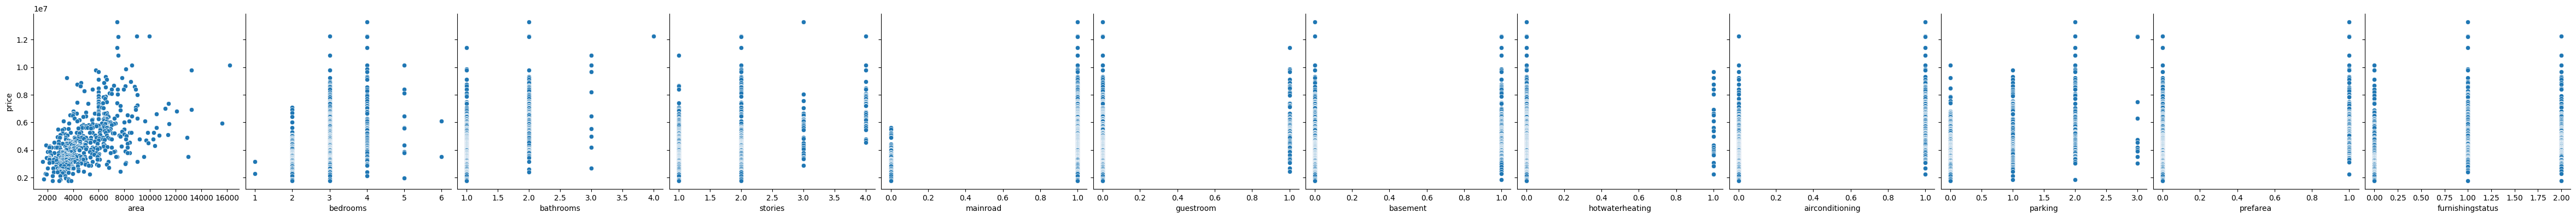

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


#import the dataset and preprocess. Change Yes to 1 and No to 0
data=pd.read_csv("House Pricing.csv")
cols=["price","area","bedrooms","bathrooms","stories","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea","furnishingstatus",]
data["furnishingstatus"] = data["furnishingstatus"].map({"unfurnished":0, "furnished":1, "semi-furnished":2})
data["guestroom"] = data["guestroom"].map({"yes":1, "no":0})
data["basement"] = data["basement"].map({"yes":1, "no":0})
data["hotwaterheating"] = data["hotwaterheating"].map({"yes":1, "no":0})
data["airconditioning"] = data["airconditioning"].map({"yes":1, "no":0})
data["prefarea"] = data["prefarea"].map({"yes":1, "no":0})
data["mainroad"] = data["mainroad"].map({"yes":1, "no":0})

data.head()
data.info()

#use Seaborn library to create and view the dataset in a plotted graph
sns.pairplot(data, x_vars=['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'], y_vars=["price"], height=4, aspect=1, kind="scatter")

X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus','basement','airconditioning','hotwaterheating','prefarea','guestroom','mainroad']]
y = data['price']

#split the dataset into training and testing sets for model evaluation.
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=0)


# **Multiple Linear Regression**


-413683.44052670244
[2.48851560e+02 1.34797060e+05 9.52483328e+05 4.28350985e+05
 2.31220585e+05 1.75478767e+05 3.57283113e+05 9.32687204e+05
 1.26266464e+06 7.02038391e+05 4.19245013e+05 5.08056849e+05]
[4360469.10808801 3651825.14293444 4007633.56403935 3251790.02519414
 3960727.37926975 2319743.32934908 4269075.89398121 6147590.96291038
 4982140.11105121 3775507.40294826 7368876.11132075 3040529.84405173
 2690437.7675811  4376282.54658484 3311080.80360264 4001951.11504087
 4790510.29639729 5904625.94070711 4964967.03295404 5719272.07812904
 4569947.17372062 3709531.49939398 4678833.05179177 3266028.39039904
 6395603.35651704 3180894.88276499 6395002.54297148 5636405.4116311
 3475283.24309187 2089888.62429109 7503673.17114829 5339957.29202299
 8372455.79778124 5920518.14996353 6839033.6543727  5588088.25182655
 6636360.78660705 1960903.03080843 5984946.98589606 4321935.53380997
 3241143.23442638 8456359.66738258 7113326.29842964 3111073.73847822
 5073686.78670679 6542931.74555763 430

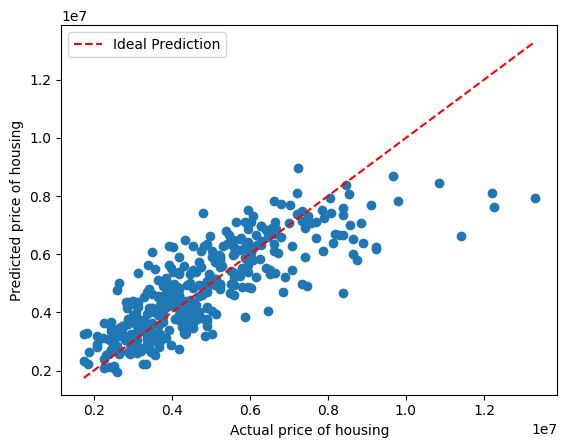

Mean Squared Error on training set: 1204930725280.4265
R2 Score on training set: 0.6559473625442808


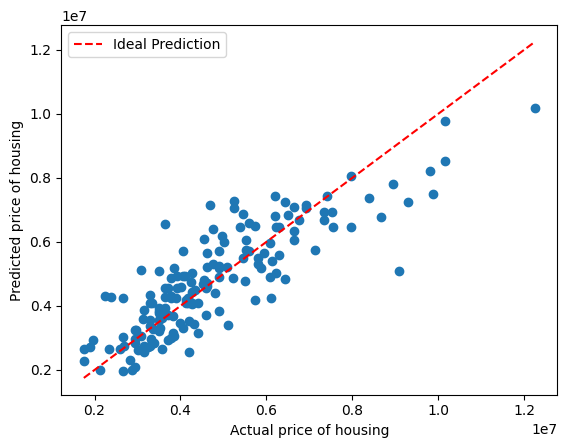

Mean Squared Error on testing set: 961887082256.5286
R2 Score on testing set: 0.7227011810334025


In [ ]:
#import Linear Regression model and fit the training data to the linear regression model

from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

intercept = linear_reg_model.intercept_
print(intercept)

gradient = linear_reg_model.coef_
print(gradient)

y_train_predicted = linear_reg_model.predict(X_train)
print(y_train_predicted)

#to view how close the prediction against the actual price
plt.scatter(y_train , y_train_predicted)
plt.xlabel("Actual price of housing")
plt.ylabel("Predicted price of housing")
x = np.linspace(min(y_train), max(y_train), 100)
y = x
plt.plot(x, y, 'r--', label='Ideal Prediction')
plt.legend()
plt.show()

#calculates the mean squared error and R2 score for the training set predictions
from sklearn.metrics import r2_score, mean_squared_error
plt.show()
r2_train = r2_score(y_train , y_train_predicted)
mse_train = mean_squared_error(y_train, y_train_predicted)
print('Mean Squared Error on training set:', mse_train)
print('R2 Score on training set:', r2_train)

#using the testing data to see what's different from the training data
y_test_predicted = linear_reg_model.predict(X_test)
plt.scatter(y_test , y_test_predicted)
plt.xlabel("Actual price of housing")
plt.ylabel("Predicted price of housing")
x = np.linspace(min(y_test), max(y_test), 100)
y = x
plt.plot(x, y, 'r--', label='Ideal Prediction')
plt.legend()
plt.show()

#Compute and print the Mean Squared Error and R2 Score on a testing set using predicted and actual values of the target variable
r2_test = r2_score(y_test , y_test_predicted)
mse_test = mean_squared_error(y_test, y_test_predicted)
print('Mean Squared Error on testing set:', mse_test)
print('R2 Score on testing set:', r2_test)

# **Linear Regression Model Evaluation**


To use Lasso regression on a dataset, we first need to define some hyperparameters to test, then create a Lasso model and train it with our data. Once we've done that, we can use the trained model to predict outcomes for new data, and evaluate how well the model performs by calculating its R-squared score(Mean Square Error).

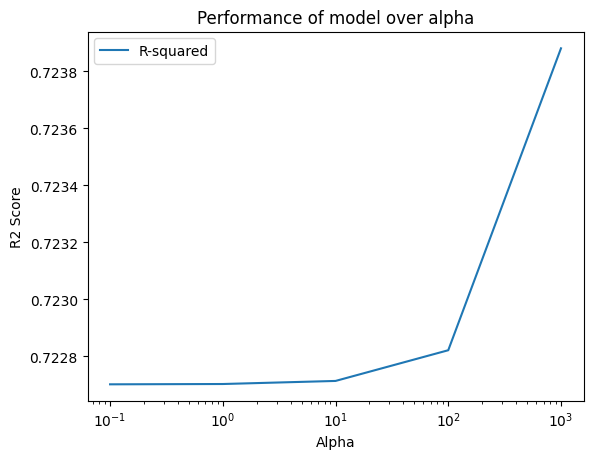

0.7238807907690353
957795282042.4572


In [ ]:
#calculates the R2 score and mean squared error between the true and predicted values of a model

alphas = [0.1, 1, 10, 100, 1000]
mse_list = []
r2_list = []

#Iterates over a list of alpha values, fits a Lasso regression model with each alpha on the training data (X_train and y_train),
#and calculates the R-squared and mean squared error metrics for the test data (X_test and y_test)
#using the calculate_metrics function, appending the results to separate lists.

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    r2, mse = calculate_metrics(lasso_model, X_test, y_test)
    r2_list.append(r2)
    mse_list.append(mse)

#plot the metrics as a function of alpha
plt.title("Performance of model over alpha")
plt.plot(alphas, r2_list, label='R-squared')
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend()
plt.show()
print(r2)
print(mse)

Greater the R2, the better the evaluation.

# **Polymonial Regression**

<ipython-input-58-0746a9a28151>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_PoRe = PoRe.fit_transform(X[:, np.newaxis])


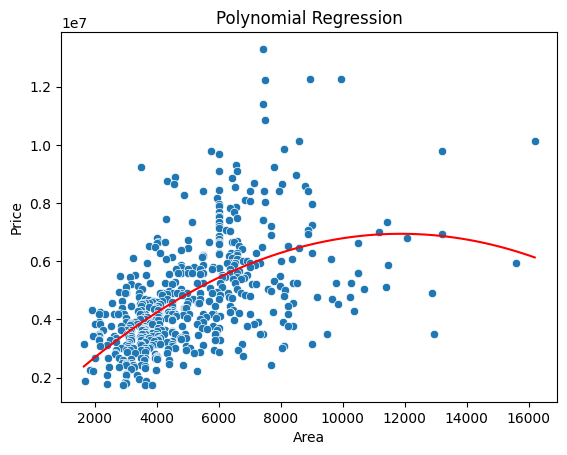

In [ ]:
#generates a scatter plot of the area feature against the price target variable,
#then plots a polynomial regression line based on the fitted model, and displays the plot with labeled axes and title

sns.scatterplot(x=X, y=y)
sns.lineplot(x=x_PoRe_seq[:,0], y=y_seq_prediction, color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Polynomial Regression')
plt.show()

In [ ]:
#calculates the mean squared error and R2 score for the polynomial regression model
mse = np.mean((y - y_prediction) ** 2)
r2 = model.score(X_PoRe, y)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 313228544663.2256
R2 Score: 0.9103043150197395


# **Multiple Polynomial Regression**

In [ ]:
#Iterates over a list of alpha values,
#fits a Lasso regression model with each alpha on the training data
#and calculates the R-squared and mean squared error metrics for the test data

X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus','basement','airconditioning','hotwaterheating','prefarea','guestroom','mainroad']]
y = data['price']

PoRe = PolynomialFeatures(degree=3, include_bias=False)
X_PoRe = PoRe.fit_transform(X)

model = LinearRegression()
model.fit(X_PoRe, y)

y_prediction = model.predict(X_PoRe)

mse = mean_squared_error(y, y_prediction)
r2 = r2_score(y, y_prediction)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Squared Error: 313228544663.2256
R2 Score: 0.9103043150197395


# **Polynomial Regression Model Evaluation**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.72748e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.52071e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.89688e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.0726e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning

Alpha:  0.01
Mean squared error:  311830287572.43695
R-squared:  0.9132320263052675

Alpha:  0.1
Mean squared error:  311830287572.43695
R-squared:  0.9053239490155714

Alpha:  1
Mean squared error:  311830287572.43695
R-squared:  0.8856569080315575

Alpha:  10
Mean squared error:  311830287572.43695
R-squared:  0.850176753370297

Alpha:  100
Mean squared error:  311830287572.43695
R-squared:  0.8127272486149715



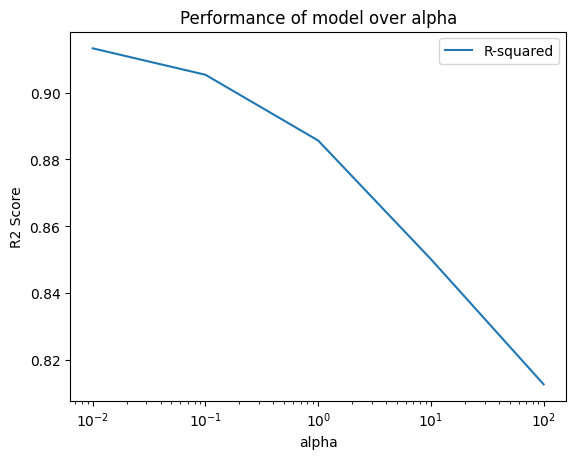

In [ ]:
#defines a list of alpha values and creates empty lists to store mean squared error and R-squared values

PoRe = PolynomialFeatures(degree=3, include_bias=False)
X_PoRe = PoRe.fit_transform(X)

X_cos = np.column_stack((X_PoRe, np.cos(X)))
model = LinearRegression()
model.fit(X_cos, y)
y_prediction = model.predict(X_cos)

alphas = [0.01, 0.1, 1, 10, 100]
mse_list = []
r2_list = []

#performs Ridge Regression on the data with different values of alpha and prints out the Mean Squared Error and R-squared for each value of alpha
for alpha in alphas:
    regressor = Ridge(alpha=alpha, solver='auto', random_state=0)
    X_poly_cos = np.column_stack((X_PoRe, np.cos(X)))
    regressor.fit(X_poly_cos, y)
    y_pred = regressor.predict(X_poly_cos)

    mse = mean_squared_error(y, y_prediction)
    r2 = r2_score(y, y_pred)

    mse_list.append(mse)
    r2_list.append(r2)

    # Print the metrics
    print('Alpha: ', alpha)
    print('Mean squared error: ', mse)
    print('R-squared: ', r2)
    print()

#create a plot of R2 score vs alpha for a Ridge Regression model
plt.title("Performance of model over alpha")
plt.plot(alphas, r2_list, label='R-squared')
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.xscale('log')
plt.legend()
plt.show()


# **Multiple Logistic Regression**

In [ ]:
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus','basement','airconditioning','hotwaterheating','prefarea','guestroom','mainroad']]
y = data['price']
X_train_LoRe , X_test_LoRe , y_train_LoRe , y_test_LoRe = train_test_split(X , y , test_size=0.3 , random_state=0)

#split into training and testing sets, scaled using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_LoRe)
X_test_scaled = scaler.transform(X_test_LoRe)
X_train_scaled
X_test_scaled
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state =0 , C=1,fit_intercept=True).fit(X_train_scaled,y_train_LoRe)
log_reg.predict(X_train_scaled)
log_reg.score(X_train_scaled , y_train_LoRe )
log_reg.score(X_test_scaled , y_test_LoRe)

0.012195121951219513

In this assignment, Logistic Regression model is proven to be weak due to a significant difference between the test and train scores. This is because Logistic Regression is only suitable for datasets with binary values of 1 or 0. As our Y-axis data contains thousands of different numbers, the r2 score value will vary.

## **CONCLUSION**

***Multiple Linear Regression***

R2 Score : 0.7229490463019856
Mean Squared Error: 961027293524.3632

***Polynomial Regression***

Mean Squared Error: 2363908046361.7305
R2 Score: 0.3230746205562587

***Multiple Polynomial Regression***

Mean squared error: 311830287572.43695
R-squared: 0.9132320263052675

Based on these metrics, it can be concluded that Multiple Polynomial Regression is the most suitable model as it has a higher R2 score and a lower Mean Squared Error than the other models.
